In [1]:
!pip install transformers networkx matplotlib torch


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from transformers import pipeline

In [3]:
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [4]:
sentence = "Barack Obama was born in Hawaii. He was elected president in 2008."

In [5]:
entities = ner_pipeline(sentence)
print(entities)

[{'entity': 'I-PER', 'score': 0.99890506, 'index': 1, 'word': 'Barack', 'start': 0, 'end': 6}, {'entity': 'I-PER', 'score': 0.9994746, 'index': 2, 'word': 'Obama', 'start': 7, 'end': 12}, {'entity': 'I-LOC', 'score': 0.99934536, 'index': 6, 'word': 'Hawaii', 'start': 25, 'end': 31}]


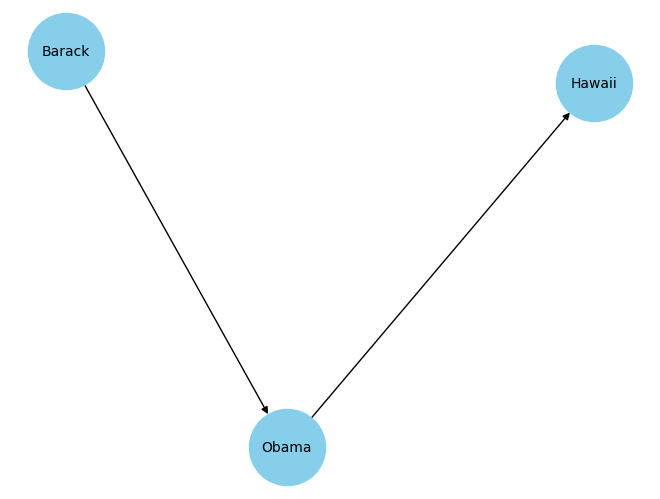

In [6]:
G = nx.DiGraph()

# Add nodes
for entity in entities:
    G.add_node(entity['word'], label=entity['entity'])

# Add edges
for i in range(len(entities) - 1):
    G.add_edge(entities[i]['word'], entities[i+1]['word'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

tokenizer_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/709M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


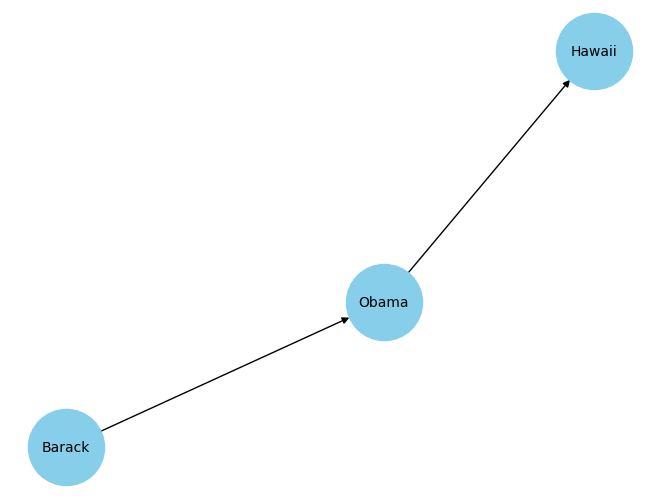

In [7]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")
model = AutoModelForTokenClassification.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
result = nlp(sentence)

entities = []
for res in result:
    entities.append((res['word'], res['entity']))

# Create a new graph
G = nx.DiGraph()

# Add nodes and edges
for i, entity in enumerate(entities):
    G.add_node(entity[0], label=entity[1])
    if i > 0:
        G.add_edge(entities[i-1][0], entity[0])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.show()